In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv('/Users/andreas/Desktop/wgu/d210/telecom_churn.csv') 

df.head()

print(df['Churn'])

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64


<h2>Make churn into dummy</h2>

In [3]:
df = df.replace(to_replace={'Churn': {1: "Yes", 0: "No"}}, value=None)
print(df['Churn'])

0       No
1       No
2       No
3       No
4       No
        ..
3328    No
3329    No
3330    No
3331    No
3332    No
Name: Churn, Length: 3333, dtype: object


In [4]:
#export cleaned data
df.to_csv('/Users/andreas/Desktop/wgu/d210/telecom_churn_edited.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   object 
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(5), object(1)
memory usage: 286.6+ KB


In [6]:
df1 = pd.read_csv('/Users/andreas/Desktop/wgu/d210/telecom_churn_edited.csv') 
  
df2 = pd.read_csv('/Users/andreas/Desktop/wgu/d210/churn_clean.csv') 


<h2>Concat dataframes into one</h2>

In [7]:
frames = [df, df2]
  
result = pd.concat(frames)
display(result)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,...,Tenure,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,No,128.0,1.0,1.0,2.7,1.0,265.1,110.0,89.0000,9.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,107.0,1.0,1.0,3.7,1.0,161.6,123.0,82.0000,9.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,137.0,1.0,0.0,0.0,0.0,243.4,114.0,52.0000,6.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,84.0,0.0,0.0,0.0,2.0,299.4,71.0,57.0000,3.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,75.0,0.0,0.0,0.0,3.0,166.7,113.0,41.0000,7.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.9794,NaN,...,68.19713,6511.252601,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0
9996,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.4811,NaN,...,61.04037,5695.951810,4.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0
9997,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.9741,NaN,...,47.41689,4159.305799,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0
9998,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.6240,NaN,...,71.09560,6468.456752,4.0,4.0,6.0,4.0,3.0,3.0,5.0,4.0


In [9]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13333 entries, 0 to 9999
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churn                 13333 non-null  object 
 1   AccountWeeks          3333 non-null   float64
 2   ContractRenewal       3333 non-null   float64
 3   DataPlan              3333 non-null   float64
 4   DataUsage             3333 non-null   float64
 5   CustServCalls         3333 non-null   float64
 6   DayMins               3333 non-null   float64
 7   DayCalls              3333 non-null   float64
 8   MonthlyCharge         13333 non-null  float64
 9   OverageFee            3333 non-null   float64
 10  RoamMins              3333 non-null   float64
 11  CaseOrder             10000 non-null  float64
 12  Customer_id           10000 non-null  object 
 13  Interaction           10000 non-null  object 
 14  UID                   10000 non-null  object 
 15  City                

In [10]:
df_joined = result

In [13]:
df_joined = df_joined[['Churn', 'MonthlyCharge']]


In [14]:
df_joined.head()

,Churn,MonthlyCharge
0,No,89.0
1,No,82.0
2,No,52.0
3,No,57.0
4,No,41.0


In [15]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13333 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Churn          13333 non-null  object 
 1   MonthlyCharge  13333 non-null  float64
dtypes: float64(1), object(1)
memory usage: 312.5+ KB


In [16]:
df_joined.info

<bound method DataFrame.info of      Churn  MonthlyCharge
0       No        89.0000
1       No        82.0000
2       No        52.0000
3       No        57.0000
4       No        41.0000
...    ...            ...
9995    No       159.9794
9996    No       207.4811
9997    No       169.9741
9998    No       252.6240
9999    No       217.4840

[13333 rows x 2 columns]>

<h2>Export into Tableau</h2>

In [17]:
df_joined.to_csv('/Users/andreas/Desktop/wgu/d210/joinedchurn.csv')

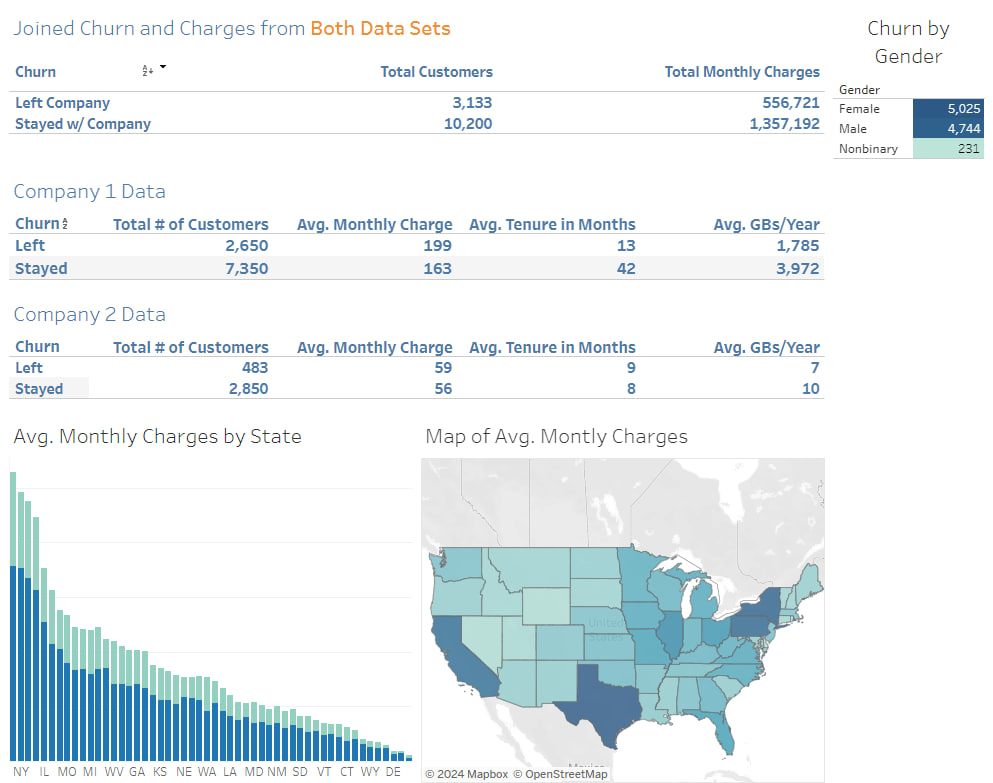